In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from mlxtend.frequent_patterns import apriori # frequently occuring items/itemsets
from mlxtend.frequent_patterns import association_rules # association rule

In [3]:
# loading dataset below.

grocery = pd.read_csv('GroceriesOriginal.csv')

In [4]:
# Here is a heading of the data. 

grocery.head(10)

,itemsetID,frankfurter,sausage,liver loaf,ham,meat,finished products,organic sausage,chicken,turkey,...,candles,light bulbs,sound storage medium,newspapers,photo/film,pot plants,flower soil/fertilizer,flower (seeds),shopping bags,bags
0,1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,6,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,7,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,8,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,9,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
9,10,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
# Taking a look at the shape.

grocery.shape

(9835, 170)

In [6]:
# Dropping the first column because it is not necessary. 

grocery = grocery.drop('itemsetID', axis=1)
grocery.shape

(9835, 169)

In [7]:
# Now I will convert the true and false integers to a binary. False (not bought) will equal 0 and True (bought) will be 1. 

grocery = grocery.astype('int')
grocery.head(10)

,frankfurter,sausage,liver loaf,ham,meat,finished products,organic sausage,chicken,turkey,pork,...,candles,light bulbs,sound storage medium,newspapers,photo/film,pot plants,flower soil/fertilizer,flower (seeds),shopping bags,bags
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Naming the rows below so that it doesn't blend in with the binary in the rows.

rnames = ['R' +str(i) for i in range(0,9835)]
grocery.index = rnames
grocery.head(10)

,frankfurter,sausage,liver loaf,ham,meat,finished products,organic sausage,chicken,turkey,pork,...,candles,light bulbs,sound storage medium,newspapers,photo/film,pot plants,flower soil/fertilizer,flower (seeds),shopping bags,bags
R0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
R1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
R2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
R3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
R4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
R5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
R6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
R7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
R8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
R9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Exploring and visualizing the data to make some sense of it


In [10]:
# Here are the items that were purchased in transaction R1 - R5

grocery.loc['R1', grocery.loc['R1',:] > 0]

tropical fruit    1
yogurt            1
coffee            1
Name: R1, dtype: int32

In [11]:
grocery.loc['R2', grocery.loc['R2',:].gt(0)]

whole milk    1
Name: R2, dtype: int32

In [12]:
grocery.loc['R3', grocery.loc['R3',:].gt(0)]

pip fruit        1
yogurt           1
cream cheese     1
meat spreads     1
Name: R3, dtype: int32

In [13]:
grocery.loc['R4', grocery.loc['R4',:].gt(0)]

other vegetables            1
whole milk                  1
condensed milk              1
long life bakery product    1
Name: R4, dtype: int32

In [14]:
grocery.loc['R5', grocery.loc['R5',:].gt(0)]

whole milk          1
butter              1
yogurt              1
rice                1
abrasive cleaner    1
Name: R5, dtype: int32

In [15]:
# Count for items in each transaction

grocery.sum(axis=1).head(15)


R0     4
R1     3
R2     1
R3     4
R4     4
R5     5
R6     1
R7     5
R8     1
R9     2
R10    5
R11    9
R12    1
R13    3
R14    2
dtype: int64

In [16]:
# Count of most popular items 

grocery.sum(0).sort_values(ascending=False).head(20)

whole milk               2513
other vegetables         1903
rolls/buns               1809
soda                     1715
yogurt                   1372
bottled water            1087
root vegetables          1072
tropical fruit           1032
shopping bags             969
sausage                   924
pastry                    875
citrus fruit              814
bottled beer              792
newspapers                785
canned beer               764
pip fruit                 744
fruit/vegetable juice     711
whipped/sour cream        705
brown bread               638
domestic eggs             624
dtype: int64

In [17]:
# Creating a dataframe below of the most popular items

popular_items = pd.DataFrame(grocery.sum(0).sort_values(ascending=False)).reset_index()
popular_items.head(15)

,index,0
0,whole milk,2513
1,other vegetables,1903
2,rolls/buns,1809
3,soda,1715
4,yogurt,1372
5,bottled water,1087
6,root vegetables,1072
7,tropical fruit,1032
8,shopping bags,969
9,sausage,924


In [18]:
# Giving the columns names

popular_items.rename(columns = {'index':'item', 0:'count'}, inplace=True)
popular_items.head(15)

,item,count
0,whole milk,2513
1,other vegetables,1903
2,rolls/buns,1809
3,soda,1715
4,yogurt,1372
5,bottled water,1087
6,root vegetables,1072
7,tropical fruit,1032
8,shopping bags,969
9,sausage,924


In [19]:
# Adding a column with the support

popular_items['support'] = popular_items['count']/grocery.shape[0]
popular_items = popular_items.head(10)
popular_items.head(15)

,item,count,support
0,whole milk,2513,0.255516
1,other vegetables,1903,0.193493
2,rolls/buns,1809,0.183935
3,soda,1715,0.174377
4,yogurt,1372,0.139502
5,bottled water,1087,0.110524
6,root vegetables,1072,0.108998
7,tropical fruit,1032,0.104931
8,shopping bags,969,0.098526
9,sausage,924,0.093950


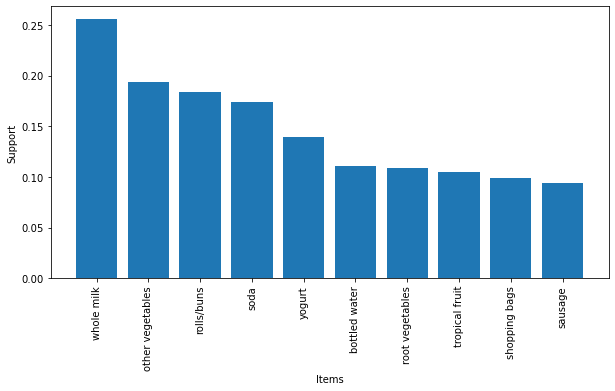

In [20]:
# Here I will use Matplotlib to create a chart to show a visual of the highest supported item.

fig = plt.figure(figsize=(10,5))

plt.bar(popular_items['item'], popular_items['support'])
plt.xlabel('Items')
plt.xticks(rotation=90)
plt.ylabel('Support')
plt.show()

In [21]:
# I will use the apriori algorithm short list the frequently occuring items and item sets.

freq_items = apriori(grocery, min_support=0.01, use_colnames=True, max_len = None)
print (freq_items.shape)

(333, 2)


In [22]:
freq_items.head(4)

,support,itemsets
0,0.058973,(frankfurter)
1,0.093950,(sausage)
2,0.026029,(ham)
3,0.025826,(meat)


In [23]:
# Here I am sorting the values by support in descending order.

freq_items.sort_values('support', ascending=False).head(20)

,support,itemsets
18,0.255516,(whole milk)
16,0.193493,(other vegetables)
40,0.183935,(rolls/buns)
60,0.174377,(soda)
23,0.139502,(yogurt)
59,0.110524,(bottled water)
13,0.108998,(root vegetables)
9,0.104931,(tropical fruit)
87,0.098526,(shopping bags)
1,0.093950,(sausage)


In [24]:
# From the frequently occuring itemsets, I will generate association rules by a metric.
# This will show itemsets with a confidence of at least 30%.

arules = association_rules(freq_items, metric='confidence', min_threshold=0.3)
arules.shape

(125, 9)

In [28]:
arules.sort_values(['consequent support'], ascending=False).iloc[:,:-2].head(50)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
0,(frankfurter),(whole milk),0.058973,0.255516,0.020539,0.348276,1.363029
75,"(other vegetables, citrus fruit)",(whole milk),0.028876,0.255516,0.013015,0.450704,1.763898
69,"(sausage, other vegetables)",(whole milk),0.026945,0.255516,0.010168,0.377358,1.476849
66,(newspapers),(whole milk),0.079817,0.255516,0.027351,0.342675,1.341110
65,(napkins),(whole milk),0.052364,0.255516,0.019725,0.376699,1.474268
64,(hygiene articles),(whole milk),0.032944,0.255516,0.012811,0.388889,1.521975
63,(chocolate),(whole milk),0.049619,0.255516,0.016675,0.336066,1.315243
61,(long life bakery product),(whole milk),0.037417,0.255516,0.013523,0.361413,1.414444
60,(fruit/vegetable juice),(whole milk),0.072293,0.255516,0.026640,0.368495,1.442160
59,(bottled water),(whole milk),0.110524,0.255516,0.034367,0.310948,1.216940


In [26]:
""""Findings

It would be interesting to see, if possible the age group and location for the data. I'm seeing a lot of confidence in health
conscious food items like vegetables, fruits, yogurt etc. Seeing red meat with vegetables also could play into the healthy eating/weight gain narrative. 
Nothing at the top is very surprising, although, towards the bottom, seeing a lot of milk being bought is interesting. 
If I sort it by the consequent support, every transaction for the first 50 rows is whole milk. 